<a href="https://colab.research.google.com/github/fpabi/Tareas/blob/main/Tarea_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install seaborn

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

1 Cargar los datos desde el rchivo csv

In [3]:
csv_path ="/content/datos_ventas.csv"
ventas = pd.read_csv(csv_path)

2 Se calculo el resumen estadistico de ventas

In [4]:
resumen_estadistico = ventas.describe()

In [5]:
print(resumen_estadistico)

         Cantidad      Precio
count  100.000000  100.000000
mean     9.570000   28.888100
std      5.876258   11.189085
min      1.000000   10.660000
25%      5.000000   19.747500
50%      9.000000   27.250000
75%     15.000000   36.842500
max     20.000000   49.790000


3 Analisis por categoria

a)cantidad total de productos vendidos

In [6]:
total_ventas_por_categoria = ventas.pivot_table(index='Categoria', values='Cantidad', aggfunc='sum')
print(total_ventas_por_categoria)

             Cantidad
Categoria            
Categoria 1       462
Categoria 2       495


b) precio promedio de venta

In [7]:
promedio_precios_por_categoria = ventas.groupby("Categoria")["Precio"].mean().reset_index()
print(promedio_precios_por_categoria)

     Categoria     Precio
0  Categoria 1  28.524783
1  Categoria 2  29.197593


c) cantidad maxima y minima de productos vendidos

In [9]:
minimo_cantidad_por_categoria = ventas.groupby("Categoria")["Cantidad"].min().reset_index()
print(minimo_cantidad_por_categoria)

     Categoria  Cantidad
0  Categoria 1         1
1  Categoria 2         1


In [10]:
maximo_cantidad_por_categoria = ventas.groupby("Categoria")["Cantidad"].max().reset_index()
print(maximo_cantidad_por_categoria)

     Categoria  Cantidad
0  Categoria 1        20
1  Categoria 2        20


d) rango intercuartil(IQR)

In [12]:
q_75 = ventas.groupby("Categoria")["Cantidad"].quantile(0.75).reset_index()
print(q_75)

     Categoria  Cantidad
0  Categoria 1      15.0
1  Categoria 2      15.0


In [14]:
q_25 = ventas.groupby("Categoria")["Cantidad"].quantile(0.25).reset_index()
print(q_25)

     Categoria  Cantidad
0  Categoria 1      5.25
1  Categoria 2      4.00


In [23]:
 # Combina los DataFrames q_75 y q_25 usando la columna 'Categoria' como clave
iqr_df = pd.merge(q_75, q_25, on="Categoria", suffixes=("_q75", "_q25"))

# Calcula el IQR restando Q1 de Q3 para cada categoría
iqr_df["IQR"] = iqr_df["Cantidad_q75"] - iqr_df["Cantidad_q25"]

# Imprime el DataFrame resultante
print(iqr_df)

     Categoria  Cantidad_q75  Cantidad_q25    IQR
0  Categoria 1          15.0          5.25   9.75
1  Categoria 2          15.0          4.00  11.00


4 se calculo la matriz de correlacion (cantidad-precio) y se grafico esta misma


          Cantidad    Precio
Cantidad  1.000000  0.018435
Precio    0.018435  1.000000


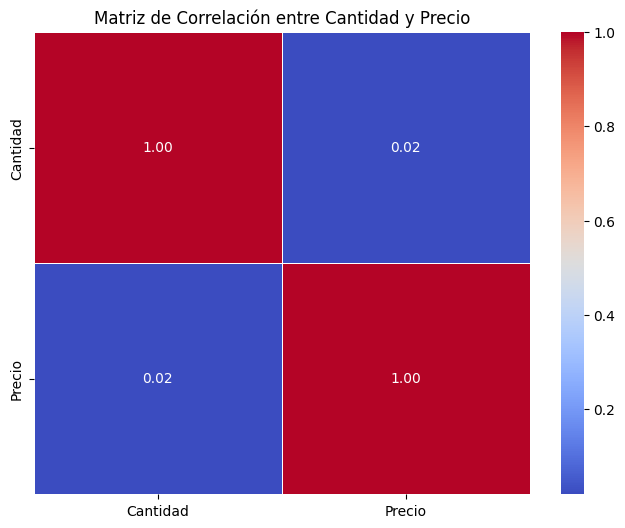

In [11]:
matriz_correlacion = ventas[['Cantidad', 'Precio']].corr()
print(matriz_correlacion)

# Crea un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación entre Cantidad y Precio')
plt.show()

5 se identificaron los productos con ventas atípicas en el DataFramed en función de la cantidad vendida y se mostrarán los nombres de los productos y las cantidades correspondientes

In [19]:

# 1. Calcula el IQR para la columna 'Cantidad'
Q3 = ventas['Cantidad'].quantile(0.75)
Q1 = ventas['Cantidad'].quantile(0.25)
IQR = Q3 - Q1

# 2. Define un criterio para identificar ventas atípicas, por ejemplo, usando un múltiplo del IQR
# Por ejemplo, si consideramos valores más de 1.5 veces el IQR por encima de Q3 o por debajo de Q1 como atípicos:
limite_superior = Q3 + .3 * IQR
limite_inferior = Q1 - .4 * IQR

# 3. Identifica los productos con ventas atípicas
productos_con_ventas_atipicas = ventas[(ventas['Cantidad'] > limite_superior) | (ventas['Cantidad'] < limite_inferior)]

# Muestra los productos con ventas atípicas
print("Productos con ventas atípicas:")
print(productos_con_ventas_atipicas)


10.0
5.0
1.0
18.0
Productos con ventas atípicas:
      Producto    Categoria     Fecha  Cantidad  Precio
13  Producto A  Categoria 1  31/12/22        20   49.37
47  Producto B  Categoria 1  01/05/23        20   17.97
50  Producto A  Categoria 2  08/02/23        19   20.00
52  Producto A  Categoria 2  11/10/22        19   18.87
57  Producto B  Categoria 1  15/01/23        20   42.83
70  Producto A  Categoria 2  13/01/23        20   23.54
96  Producto B  Categoria 1  16/06/23        20   11.22


6 calcular y mostrar el porcentaje de ventas acumuladas por categoría ordenando las categorías de mayor a menor por su porcentaje de ventas acumuladas

In [21]:
ventas_por_categoria = ventas.groupby('Categoria')['Cantidad'].sum().reset_index()

# se calculo el porcentaje de ventas acumuladas por categoría
ventas_por_categoria['Porcentaje'] = ventas_por_categoria['Cantidad'] / ventas['Cantidad'].sum() * 100

# 3. Ordena las categorías por su porcentaje de ventas acumuladas de mayor a menor
ventas_por_categoria = ventas_por_categoria.sort_values(by='Porcentaje', ascending=False)

print(ventas_por_categoria)


     Categoria  Cantidad  Porcentaje
1  Categoria 2       495   51.724138
0  Categoria 1       462   48.275862
